## Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

* Number of Instances: 569

* Number of Attributes: 30 numeric predictive attributes and the class

* Attribute Information:
     - radius (mean of distances from center to points on the perimeter)
     - texture (standard deviation of gray-scale values)
     - perimeter
     - area
     - smoothness (local variation in radius lengths)
     - compactness (perimeter^2 / area - 1.0)
     - concavity (severity of concave portions of the contour)
     - concave points (number of concave portions of the contour)
     - symmetry 
     - fractal dimension ("coastline approximation" - 1)

* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

     - class:
         - WDBC-Malignant
         - WDBC-Benign
_______________________________________________________________________________________________________________________________


    Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

* Missing Attribute Values: None

* Class Distribution: 212 - Malignant, 357 - Benign

* Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

* Donor: Nick Street

* Date: November, 1995

* This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets :[Breast_Cancer](https://goo.gl/U2Uwz2)

* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

* Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

* The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

* This database is also available through the UW CS ftp server : ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

* Topic_References :

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

* We could see whether features are having Null values or not by using df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

* For statistical analysis : df.describe()

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### EDA 

* `For a classification problem it is always best to use the countplot to check whether the label is well-balanced or not`

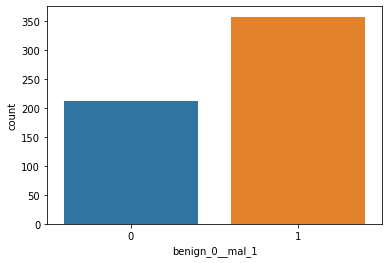

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

*  It seems there are more cases of malignant tumor but the difference is not extreme

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

* `In this way we can check which features are highly positively correlated or negatively correlated with the label`

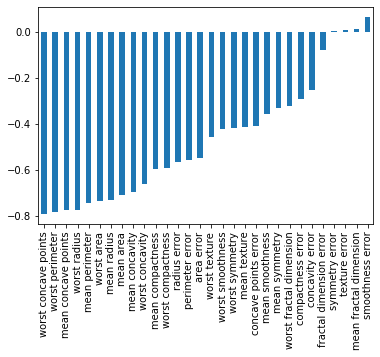

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')        # drop the label

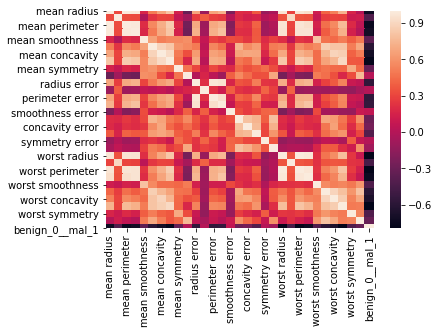

In [12]:
sns.heatmap(df.corr())

### Train/Test Split 

In [13]:
X = df.drop('benign_0__mal_1', axis=1).values

y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

### Create a Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

* `No.of neurons depends on the size of the actual feature data`

In [21]:
X_train.shape

(426, 30)

##### For a Binary-Classification Model :

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Choosing no.of hidden layers and nodes in a feed forward network : [FFN](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [22]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


# Binary-classification

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Training the Model 

### Example-1 : Choosing too many epochs and Over-fitting

* Choosing batch_size and epochs : [batch_size vs epochs trade_off](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)

* Rules for choosing a batch_size : [Batch_size rules](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
)

In [24]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6857 - val_loss: 0.6776
Epoch 2/600
426/426 [==============================] - 0s 375us/sample - loss: 0.6619 - val_loss: 0.6533
Epoch 3/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6290 - val_loss: 0.6128
Epoch 4/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5849 - val_loss: 0.5633
Epoch 5/600
426/426 [==============================] - 0s 86us/sample - loss: 0.5325 - val_loss: 0.5046
Epoch 6/600
426/426 [==============================] - 0s 84us/sample - loss: 0.4747 - val_loss: 0.4447
Epoch 7/600
426/426 [==============================] - 0s 84us/sample - loss: 0.4199 - val_loss: 0.3902
Epoch 8/600
426/426 [==============================] - 0s 94us/sample - loss: 0.3717 - val_loss: 0.3402
Epoch 9/600
426/426 [==============================] - 0s 84us/sample - loss: 0.3290 - val_loss: 0.3004
Epoch 10/600
426/4

426/426 [==============================] - 0s 75us/sample - loss: 0.0545 - val_loss: 0.1213
Epoch 79/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0539 - val_loss: 0.1220
Epoch 80/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0529 - val_loss: 0.1223
Epoch 81/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0531 - val_loss: 0.1274
Epoch 82/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0592 - val_loss: 0.1173
Epoch 83/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0549 - val_loss: 0.1343
Epoch 84/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0533 - val_loss: 0.1233
Epoch 85/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0545 - val_loss: 0.1272
Epoch 86/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0521 - val_loss: 0.1258
Epoch 87/600
426/426 [==============================] - 0s 84us/samp

426/426 [==============================] - 0s 84us/sample - loss: 0.0450 - val_loss: 0.1630
Epoch 156/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0422 - val_loss: 0.1455
Epoch 157/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0389 - val_loss: 0.1617
Epoch 158/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0393 - val_loss: 0.1466
Epoch 159/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0406 - val_loss: 0.1745
Epoch 160/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0483 - val_loss: 0.1454
Epoch 161/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0388 - val_loss: 0.1565
Epoch 162/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0385 - val_loss: 0.1556
Epoch 163/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0384 - val_loss: 0.1563
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 83us/sample - loss: 0.0351 - val_loss: 0.1700
Epoch 233/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0303 - val_loss: 0.1688
Epoch 234/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0289 - val_loss: 0.1692
Epoch 235/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0331 - val_loss: 0.1733
Epoch 236/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0350 - val_loss: 0.1925
Epoch 237/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0316 - val_loss: 0.1659
Epoch 238/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0327 - val_loss: 0.1701
Epoch 239/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0277 - val_loss: 0.1747
Epoch 240/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0282 - val_loss: 0.1660
Epoch 241/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 84us/sample - loss: 0.0251 - val_loss: 0.1949
Epoch 310/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0217 - val_loss: 0.1899
Epoch 311/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0210 - val_loss: 0.1952
Epoch 312/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0209 - val_loss: 0.2011
Epoch 313/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0216 - val_loss: 0.2034
Epoch 314/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0211 - val_loss: 0.1826
Epoch 315/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0211 - val_loss: 0.2060
Epoch 316/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0221 - val_loss: 0.1851
Epoch 317/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0204 - val_loss: 0.2181
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 169us/sample - loss: 0.0179 - val_loss: 0.2359
Epoch 387/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0192 - val_loss: 0.2133
Epoch 388/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0198 - val_loss: 0.2481
Epoch 389/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0165 - val_loss: 0.2064
Epoch 390/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0164 - val_loss: 0.2465
Epoch 391/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0179 - val_loss: 0.2243
Epoch 392/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0159 - val_loss: 0.2132
Epoch 393/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0166 - val_loss: 0.2252
Epoch 394/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0161 - val_loss: 0.2450
Epoch 395/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 85us/sample - loss: 0.0128 - val_loss: 0.2551
Epoch 464/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0133 - val_loss: 0.2625
Epoch 465/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0136 - val_loss: 0.2473
Epoch 466/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0140 - val_loss: 0.2646
Epoch 467/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0140 - val_loss: 0.2398
Epoch 468/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0129 - val_loss: 0.2397
Epoch 469/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0140 - val_loss: 0.2653
Epoch 470/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0127 - val_loss: 0.2584
Epoch 471/600
426/426 [==============================] - ETA: 0s - loss: 0.002 - 0s 84us/sample - loss: 0.0119 - val_loss: 0.2651
Epoch 472/600
426/426 [=============

426/426 [==============================] - 0s 83us/sample - loss: 0.0101 - val_loss: 0.2961
Epoch 541/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0100 - val_loss: 0.2840
Epoch 542/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0110 - val_loss: 0.3279
Epoch 543/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0101 - val_loss: 0.2748
Epoch 544/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0102 - val_loss: 0.2964
Epoch 545/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0108 - val_loss: 0.3138
Epoch 546/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0105 - val_loss: 0.2764
Epoch 547/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0123 - val_loss: 0.3082
Epoch 548/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0110 - val_loss: 0.3101
Epoch 549/600
426/426 [==============================] - 0s 

In [25]:
losses = pd.DataFrame(model.history.history)

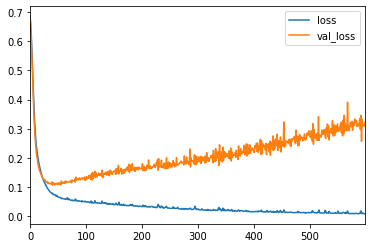

In [26]:
losses.plot()

* So we can clearly see that we are training for too many epochs and hence over-fitting

### Example-2 : Early Stopping

* `Let's use keras' callbacks to track the val_loss and stop training once the val_loss begins increasing too much`

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


# Binary-classification

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

##### Stop training when a monitored quantity has stopped improving


* `Arguments`


* monitor : Quantity to be monitored

* min_delta : Minimum change in the monitored quantity to qualify as an improvement, i.e., an absolute change of less than min_delta will count as no improvement

* patience : No.of epochs with no improvement after which training will be stopped

* verbose : verbose

* mode : One of {'auto', 'min', 'max'}. 

            * min : the training will stop when the quantity monitored has stopped decreasing
            
            * max : it will stop when the quantity monitored has stopped increasing
            
            * auto : the direction is automatically inferred from the name of the monitored quantity

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=600, verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 907us/sample - loss: 0.6874 - val_loss: 0.6682
Epoch 2/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6496 - val_loss: 0.6341
Epoch 3/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6191 - val_loss: 0.6033
Epoch 4/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5873 - val_loss: 0.5685
Epoch 5/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5503 - val_loss: 0.5280
Epoch 6/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5068 - val_loss: 0.4725
Epoch 7/600
426/426 [==============================] - 0s 84us/sample - loss: 0.4462 - val_loss: 0.4118
Epoch 8/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3958 - val_loss: 0.3655
Epoch 9/600
426/426 [==============================] - 0s 76us/sample - loss: 0.3533 - val_loss: 0.3237
Epoch 10/600
426/

* `Notice that early stop occured at 66th epoch`

In [32]:
model_loss = pd.DataFrame(model.history.history)

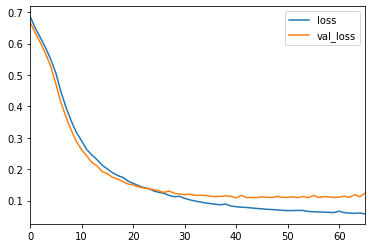

In [33]:
model_loss.plot()

### Example-3 : Adding in DropOut Layers

* DropOut layers will essentially turn-off a percentage of neurons randomly

In [34]:
from tensorflow.keras.layers import Dropout

##### Each DropOut layer will drop a user-defined fraction of neuron units in the previous layer every batch

In [35]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))            # generally 0.2 to 0.5

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))


# Binary-classification

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7026 - val_loss: 0.6708
Epoch 2/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6690 - val_loss: 0.6511
Epoch 3/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6539 - val_loss: 0.6300
Epoch 4/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6212 - val_loss: 0.6031
Epoch 5/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5957 - val_loss: 0.5752
Epoch 6/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5868 - val_loss: 0.5468
Epoch 7/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5629 - val_loss: 0.5162
Epoch 8/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5468 - val_loss: 0.4858
Epoch 9/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5289 - val_loss: 0.4571
Epoch 10/600
426/42

426/426 [==============================] - 0s 87us/sample - loss: 0.1301 - val_loss: 0.1201
Epoch 79/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1158 - val_loss: 0.1161
Epoch 80/600
426/426 [==============================] - 0s 86us/sample - loss: 0.1177 - val_loss: 0.1170
Epoch 81/600
426/426 [==============================] - 0s 75us/sample - loss: 0.1236 - val_loss: 0.1244
Epoch 82/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1371 - val_loss: 0.1169
Epoch 83/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1229 - val_loss: 0.1160
Epoch 84/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1089 - val_loss: 0.1193
Epoch 85/600
426/426 [==============================] - 0s 94us/sample - loss: 0.1049 - val_loss: 0.1183
Epoch 86/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0962 - val_loss: 0.1152
Epoch 87/600
426/426 [==============================] - 0s 94us/samp

In [37]:
loss = pd.DataFrame(model.history.history)

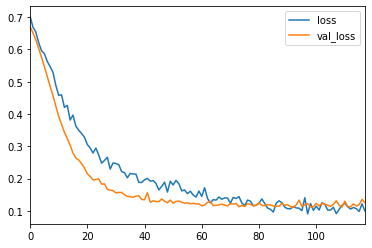

In [38]:
loss.plot()

### Model Evaluation

* Notice that here label classes are just 0 and 1 so need of OneHotEncoding earlier

In [42]:
predictions = model.predict_classes(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

* Have a look at : [precision&recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [46]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]


* `It seems there is only one misclassified point in FP and 4 missclassified points in FN`